D:\Anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


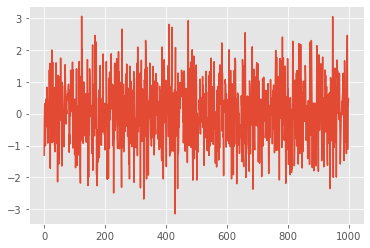

In [2]:
# multivariate Gaussian - sample
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mean = [20, 20]
cov = [[5, 0], [25, 25]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T # array.T -> transpose
mu, sigma = 0, 1.0
normal_values = np.random.normal(mu, sigma, 1000)
plt.plot(normal_values)

[0, 40, 0, 40]

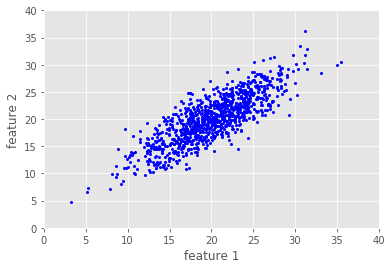

In [3]:
plt.plot(x, y,'bo', markersize=2, zorder=1)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.axis([0,40,0,40])

In [4]:
# Principal Component Analysis
import cv2
a = np.array([[1], [2], [3]])
a.shape
b = np.array([[5], [4], [7]])
b.shape
np.vstack((a,b))
# stack x,y
_x = np.vstack((x, y)).T
mu, eig = cv2.PCACompute(_x, np.array([])) # eigenvectors
eig

array([[ 0.71480501,  0.69932382],
       [-0.69932382,  0.71480501]])

Text(15.104733294020873, 22.859220037921418, 'u2')

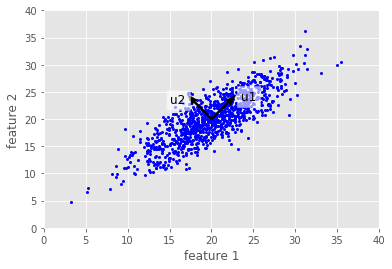

In [5]:
# plot eigenvectors
plt.plot(x, y, 'bo', markersize=2, zorder=1)
plt.axis([0,40,0,40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0]+5*eig[0,0], mean[1]+5*eig[0,1], 'u1', zorder=5, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0]+7*eig[1,0], mean[1]+4*eig[1,1], 'u2', zorder=5, fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

Text(0, 0.5, 'second principal component')

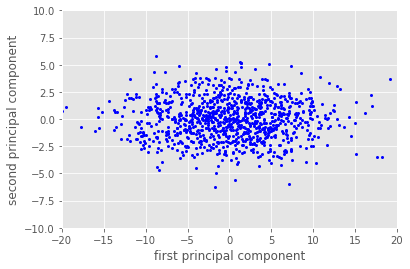

In [6]:
new_x = cv2.PCAProject(_x, mu, eig)
plt.plot(new_x[:,0], new_x[:,1], 'bo', markersize=2)
plt.axis([-20,20,-10,10])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

Text(0, 0.5, 'second independent component')

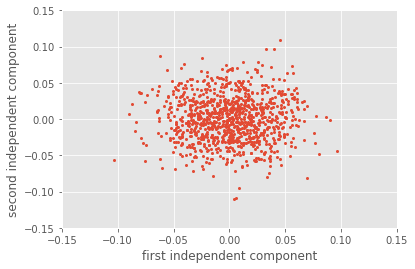

In [12]:
# Independent Component Analysis
from sklearn import decomposition
ica = decomposition.FastICA(tol=0.001, max_iter=50)
x_ica = ica.fit_transform(_x)
plt.plot(x_ica[:,0], x_ica[:,1], 'o', markersize=2)
plt.axis([-0.15, 0.15, -0.15, 0.15])
plt.xlabel('first independent component')
plt.ylabel('second independent component')

Text(0, 0.5, 'second non-negative component')

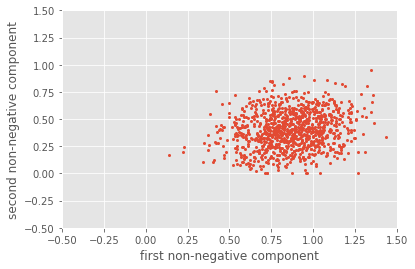

In [20]:
# Non-negative Matrix Factorization NMF
nmf = decomposition.NMF()
x_nmf = nmf.fit_transform(_x)
plt.plot(x_nmf[:,0], x_nmf[:,1], 'o', markersize=2)
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')

In [8]:
### representing categorical features 
# one-hot encoding in scikit-learn
from sklearn.feature_extraction import DictVectorizer
data = [
 {'name': 'Alan Turing', 'born': 1912, 'died': 1954},
 {'name': 'Herbert A. Simon', 'born': 1916, 'died': 2001},
 {'name': 'Jacek Karpinski', 'born': 1927, 'died': 2010},
 {'name': 'J.C.R. Licklider', 'born': 1915, 'died': 1990},
 {'name': 'Marvin Minsky', 'born': 1927, 'died': 2016}
]
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[1912, 1954,    1,    0,    0,    0,    0],
       [1916, 2001,    0,    1,    0,    0,    0],
       [1927, 2010,    0,    0,    0,    1,    0],
       [1915, 1990,    0,    0,    1,    0,    0],
       [1927, 2016,    0,    0,    0,    0,    1]])

In [9]:
vec.get_feature_names()

['born',
 'died',
 'name=Alan Turing',
 'name=Herbert A. Simon',
 'name=J.C.R. Licklider',
 'name=Jacek Karpinski',
 'name=Marvin Minsky']

In [12]:
vec_sparse = DictVectorizer(sparse=True, dtype=int)
vec_sparse.fit_transform(data)

<5x7 sparse matrix of type '<class 'numpy.int32'>'
	with 15 stored elements in Compressed Sparse Row format>

In [5]:
### representing text features
from sklearn.feature_extraction.text import CountVectorizer
sample = [
    'feature engineering',
    'feature selection',
    'feature extraction'
]
# word count
cvec = CountVectorizer()
res = cvec.fit_transform(sample)
res.toarray()

array([[1, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]], dtype=int64)

In [6]:
cvec.get_feature_names()

['engineering', 'extraction', 'feature', 'selection']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x = vec.fit_transform(sample)
x.toarray()

array([[0.861037  , 0.        , 0.50854232, 0.        ],
       [0.        , 0.        , 0.50854232, 0.861037  ],
       [0.        , 0.861037  , 0.50854232, 0.        ]])

In [9]:
vec.get_feature_names()

['engineering', 'extraction', 'feature', 'selection']

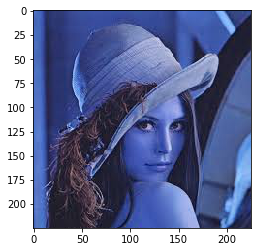

In [15]:
### representing images
import cv2
import matplotlib.pyplot as plt
img_bgr = cv2.imread('../data/lena.jpg')
cv2.
plt.imshow(img_bgr)

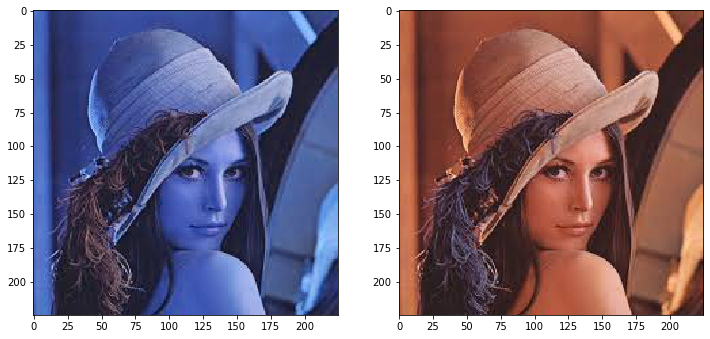

In [20]:
### representing images
import cv2
import matplotlib.pyplot as plt
img_bgr = cv2.imread('../data/lena.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_bgr)
plt.subplot(1,2,2)
plt.imshow(img_rgb)

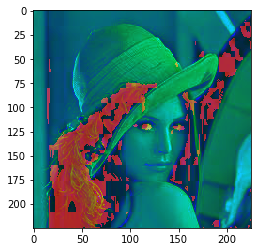

In [25]:
# HSV / HLS
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HLS)
plt.imshow(img_hls)

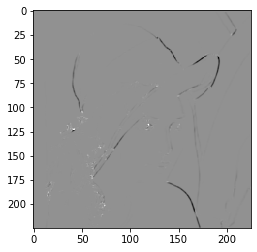

In [32]:
# detect corners of images
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)
plt.imshow(corners, cmap='gray')